In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_pts, noise=0.1, factor=0.2)
x_data = torch.tensor(X, dtype=torch.float)
y_data = torch.tensor(y, dtype=torch.float)


In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
  plt.show()

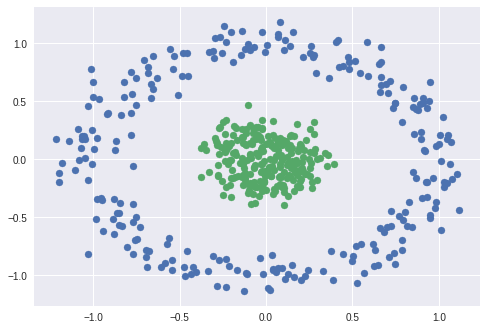

In [0]:
scatter_plot()

In [0]:
class Perceptron(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
    
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [0]:
model = Perceptron(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.6315,  0.0501],
        [-0.3059,  0.3486],
        [-0.3518, -0.1185],
        [-0.0794, -0.5803]], requires_grad=True), Parameter containing:
tensor([0.5861, 0.1078, 0.5474, 0.5300], requires_grad=True), Parameter containing:
tensor([[ 0.2513,  0.1348, -0.3630, -0.0906]], requires_grad=True), Parameter containing:
tensor([0.2064], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)


In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('Epoch', i, 'Loss', loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 Loss 0.6960719227790833
Epoch 1 Loss 0.6933714151382446
Epoch 2 Loss 0.6948693990707397
Epoch 3 Loss 0.6941591501235962
Epoch 4 Loss 0.6929423809051514
Epoch 5 Loss 0.6927568316459656
Epoch 6 Loss 0.6932313442230225
Epoch 7 Loss 0.6932521462440491
Epoch 8 Loss 0.6926763653755188
Epoch 9 Loss 0.6920820474624634
Epoch 10 Loss 0.6918849945068359
Epoch 11 Loss 0.6919407248497009
Epoch 12 Loss 0.6918132305145264
Epoch 13 Loss 0.6913363933563232
Epoch 14 Loss 0.690718412399292
Epoch 15 Loss 0.6902204155921936
Epoch 16 Loss 0.6898666620254517
Epoch 17 Loss 0.6894494295120239
Epoch 18 Loss 0.6887904405593872
Epoch 19 Loss 0.6879196166992188
Epoch 20 Loss 0.6869854927062988
Epoch 21 Loss 0.6860713362693787
Epoch 22 Loss 0.6851024627685547
Epoch 23 Loss 0.6839488744735718
Epoch 24 Loss 0.6825685501098633
Epoch 25 Loss 0.6810269355773926
Epoch 26 Loss 0.6793849468231201
Epoch 27 Loss 0.6776168346405029
Epoch 28 Loss 0.6756302714347839
Epoch 29 Loss 0.6733623147010803
Epoch 30 Loss 0.67082

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


80 Loss 0.40492677688598633
Epoch 81 Loss 0.4019717276096344
Epoch 82 Loss 0.3991434574127197
Epoch 83 Loss 0.39643821120262146
Epoch 84 Loss 0.3938502371311188
Epoch 85 Loss 0.3913740813732147
Epoch 86 Loss 0.3890050947666168
Epoch 87 Loss 0.3867378830909729
Epoch 88 Loss 0.3845679759979248
Epoch 89 Loss 0.3824910819530487
Epoch 90 Loss 0.3805023729801178
Epoch 91 Loss 0.37859785556793213
Epoch 92 Loss 0.3767729103565216
Epoch 93 Loss 0.37502336502075195
Epoch 94 Loss 0.37334612011909485
Epoch 95 Loss 0.3717372417449951
Epoch 96 Loss 0.3701924681663513
Epoch 97 Loss 0.3687092661857605
Epoch 98 Loss 0.3672834038734436
Epoch 99 Loss 0.36591243743896484
Epoch 100 Loss 0.36459264159202576
Epoch 101 Loss 0.3633214831352234
Epoch 102 Loss 0.3620959222316742
Epoch 103 Loss 0.36091339588165283
Epoch 104 Loss 0.35977140069007874
Epoch 105 Loss 0.3586672246456146
Epoch 106 Loss 0.35759851336479187
Epoch 107 Loss 0.3565634787082672
Epoch 108 Loss 0.355559378862381
Epoch 109 Loss 0.35458409786224

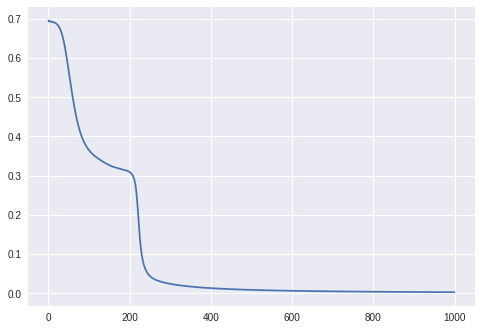

In [0]:
plt.plot(range(epochs), losses)

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float)
  print(grid)
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  print(z)
  plt.contourf(xx, yy, z)

tensor([[-1.4662, -1.3854],
        [-1.4084, -1.3854],
        [-1.3506, -1.3854],
        ...,
        [ 1.2505,  1.4359],
        [ 1.3083,  1.4359],
        [ 1.3661,  1.4359]])
[[8.68722168e-07 2.89010160e-07 1.16500054e-07 ... 3.68120638e-03
  3.68476170e-03 3.68824345e-03]
 [8.30875342e-06 2.29098919e-06 6.78318258e-07 ... 3.68835218e-03
  3.69179179e-03 3.69506585e-03]
 [7.17261501e-05 2.25003405e-05 6.31707462e-06 ... 3.69532593e-03
  3.69848381e-03 3.70131689e-03]
 ...
 [3.41606385e-04 1.70238374e-04 7.32018379e-05 ... 9.72995360e-04
  9.77492426e-04 9.82075813e-04]
 [1.04693223e-04 4.13390226e-05 1.44186088e-05 ... 9.81963472e-04
  9.86644882e-04 9.91418492e-04]
 [2.23240932e-05 7.36379479e-06 2.30949922e-06 ... 9.91297537e-04
  9.96169518e-04 1.00113801e-03]]


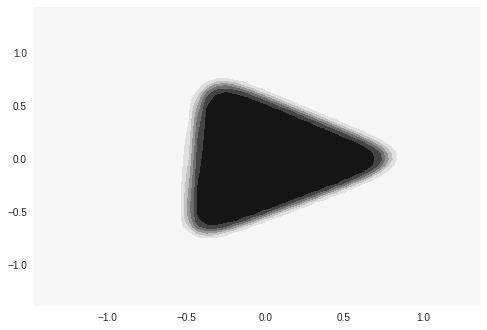

In [0]:
plot_decision_boundary(X, y)
scatter_plot()

In [0]:
x = 0.025
y = 0.025
point = torch.tensor([x, y])
print(model.predict(point))

1
